## Car Price Prediction

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

#### Import the required modules and read the data from the file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
car_data = pd.read_csv("CarPrice_Assignment.csv")

#### Check the basics of the data

In [3]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car_data.shape

(205, 26)

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Check for outliers in the Price Data

Let us check for outliers in the price column and see if we can remove the same

In [7]:
car_data.price.describe(percentiles = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.97, 0.99])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
5%        6197.000000
10%       6657.000000
20%       7385.800000
30%       8022.000000
40%       9036.600000
50%      10295.000000
60%      12515.600000
70%      15458.000000
80%      17493.800000
90%      22563.000000
95%      32472.400000
97%      35490.720000
99%      40802.720000
max      45400.000000
Name: price, dtype: float64

##### From the above data we can see prices are jumping suddenly from 97% to 100%. Let us remove the cars with very high prices

In [8]:
car_data = car_data[car_data['price'] <= 35490.72]

In [9]:
car_data.shape

(198, 26)

#### Get the company name from the car name and use the company name only

In [10]:
def getCompanyName(carName):
    temp = carName.split(' ')
    return temp[0]

In [11]:
car_data['CarName'] = car_data['CarName'].apply(getCompanyName)

In [12]:
car_data.rename(columns = {"CarName":"carCompany"}, inplace = True)

In [13]:
car_data.drop(['car_ID'], axis = 1, inplace = True)

#### Some of the car company names are misspelled or abbreviated; changing them to proper name

In [14]:
car_data.loc[(car_data['carCompany'] == "vw") | 
         (car_data['carCompany'] == "vokswagen")
         , 'carCompany'] = 'volkswagen'

car_data.loc[car_data['carCompany'] == "porcshce", 'carCompany'] = 'porsche'

car_data.loc[car_data['carCompany'] == "toyouta", 'carCompany'] = 'toyota'

car_data.loc[car_data['carCompany'] == "Nissan", 'carCompany'] = 'nissan'

car_data.loc[car_data['carCompany'] == "maxda", 'carCompany'] = 'mazda'

#### Multicolinearilty check

Check if any variables are highly correlated; if so remove the correlated variables

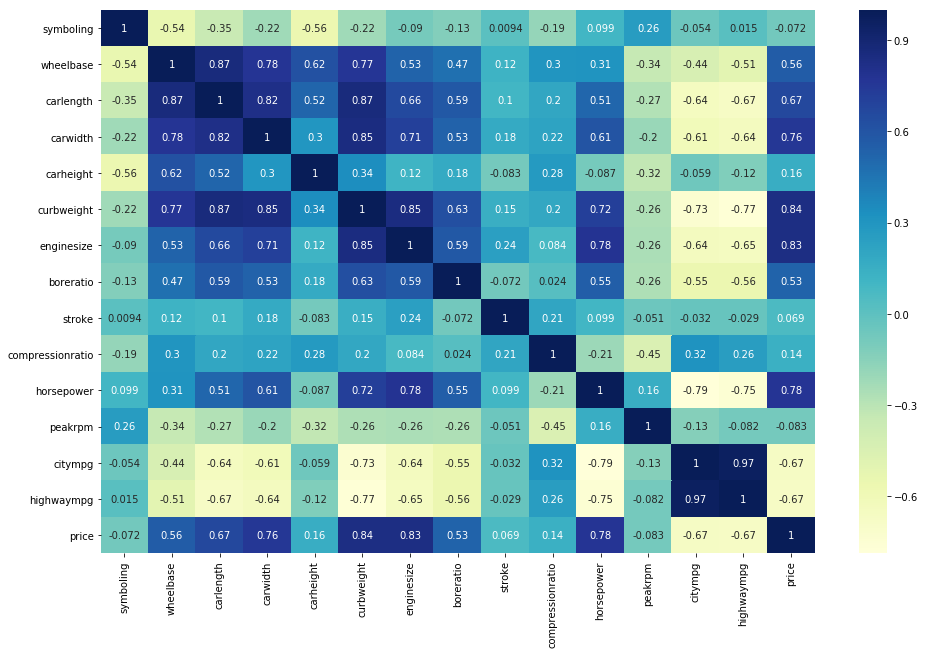

In [15]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(car_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### Remove the highly correlated variables
<ul>
    <li>carlength and warwidth have a high correlation, dropping carwidth</li>
    <li>carlength and curbwidth have a high correlation, dropping curbweight</li>
    <li>carlength and wheelbase have a high correlation, dropping wheelbase</li>
    <li>citympg and highwaympg have a high correlation, dropping highwaympg</li>
    <li>enginesize and horsepower have a high correlation, dropping horsepower</li>
</ul>

In [16]:
car_data = car_data.drop(['carwidth', 'curbweight', 'wheelbase', 'highwaympg', 'horsepower'], axis = 1)

##### Re-checking the correlation among the variables; we can see that most of the highly correlated values are removed now 

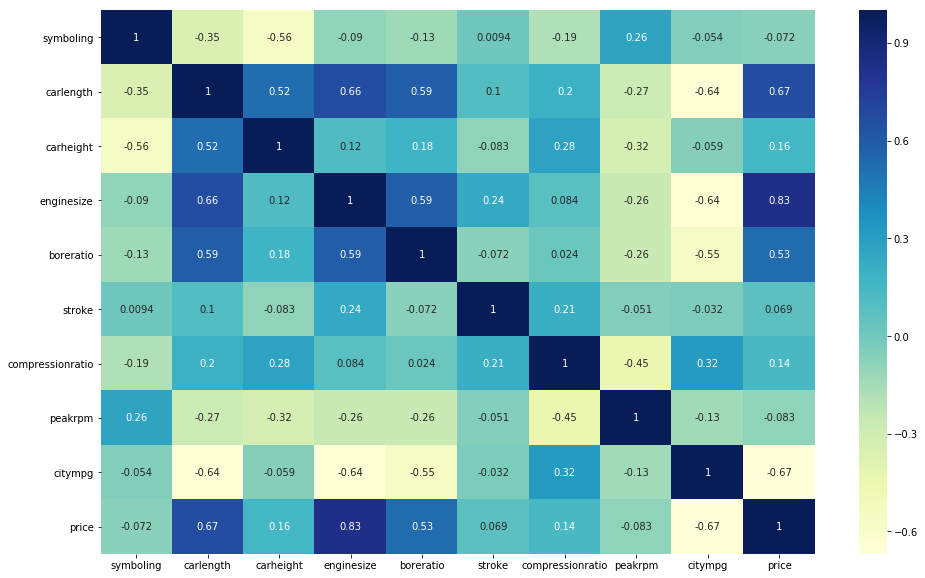

In [17]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(car_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Data Visulaization

Let us visualize the data by drawing some plots and see if we can find some trend. We are drawing two types of plots.
<ul>
    <li>Scatter Plots for Numerical / Continuous Data</li>
    <li>Box Plots for Categorical Data</li>
</ul>

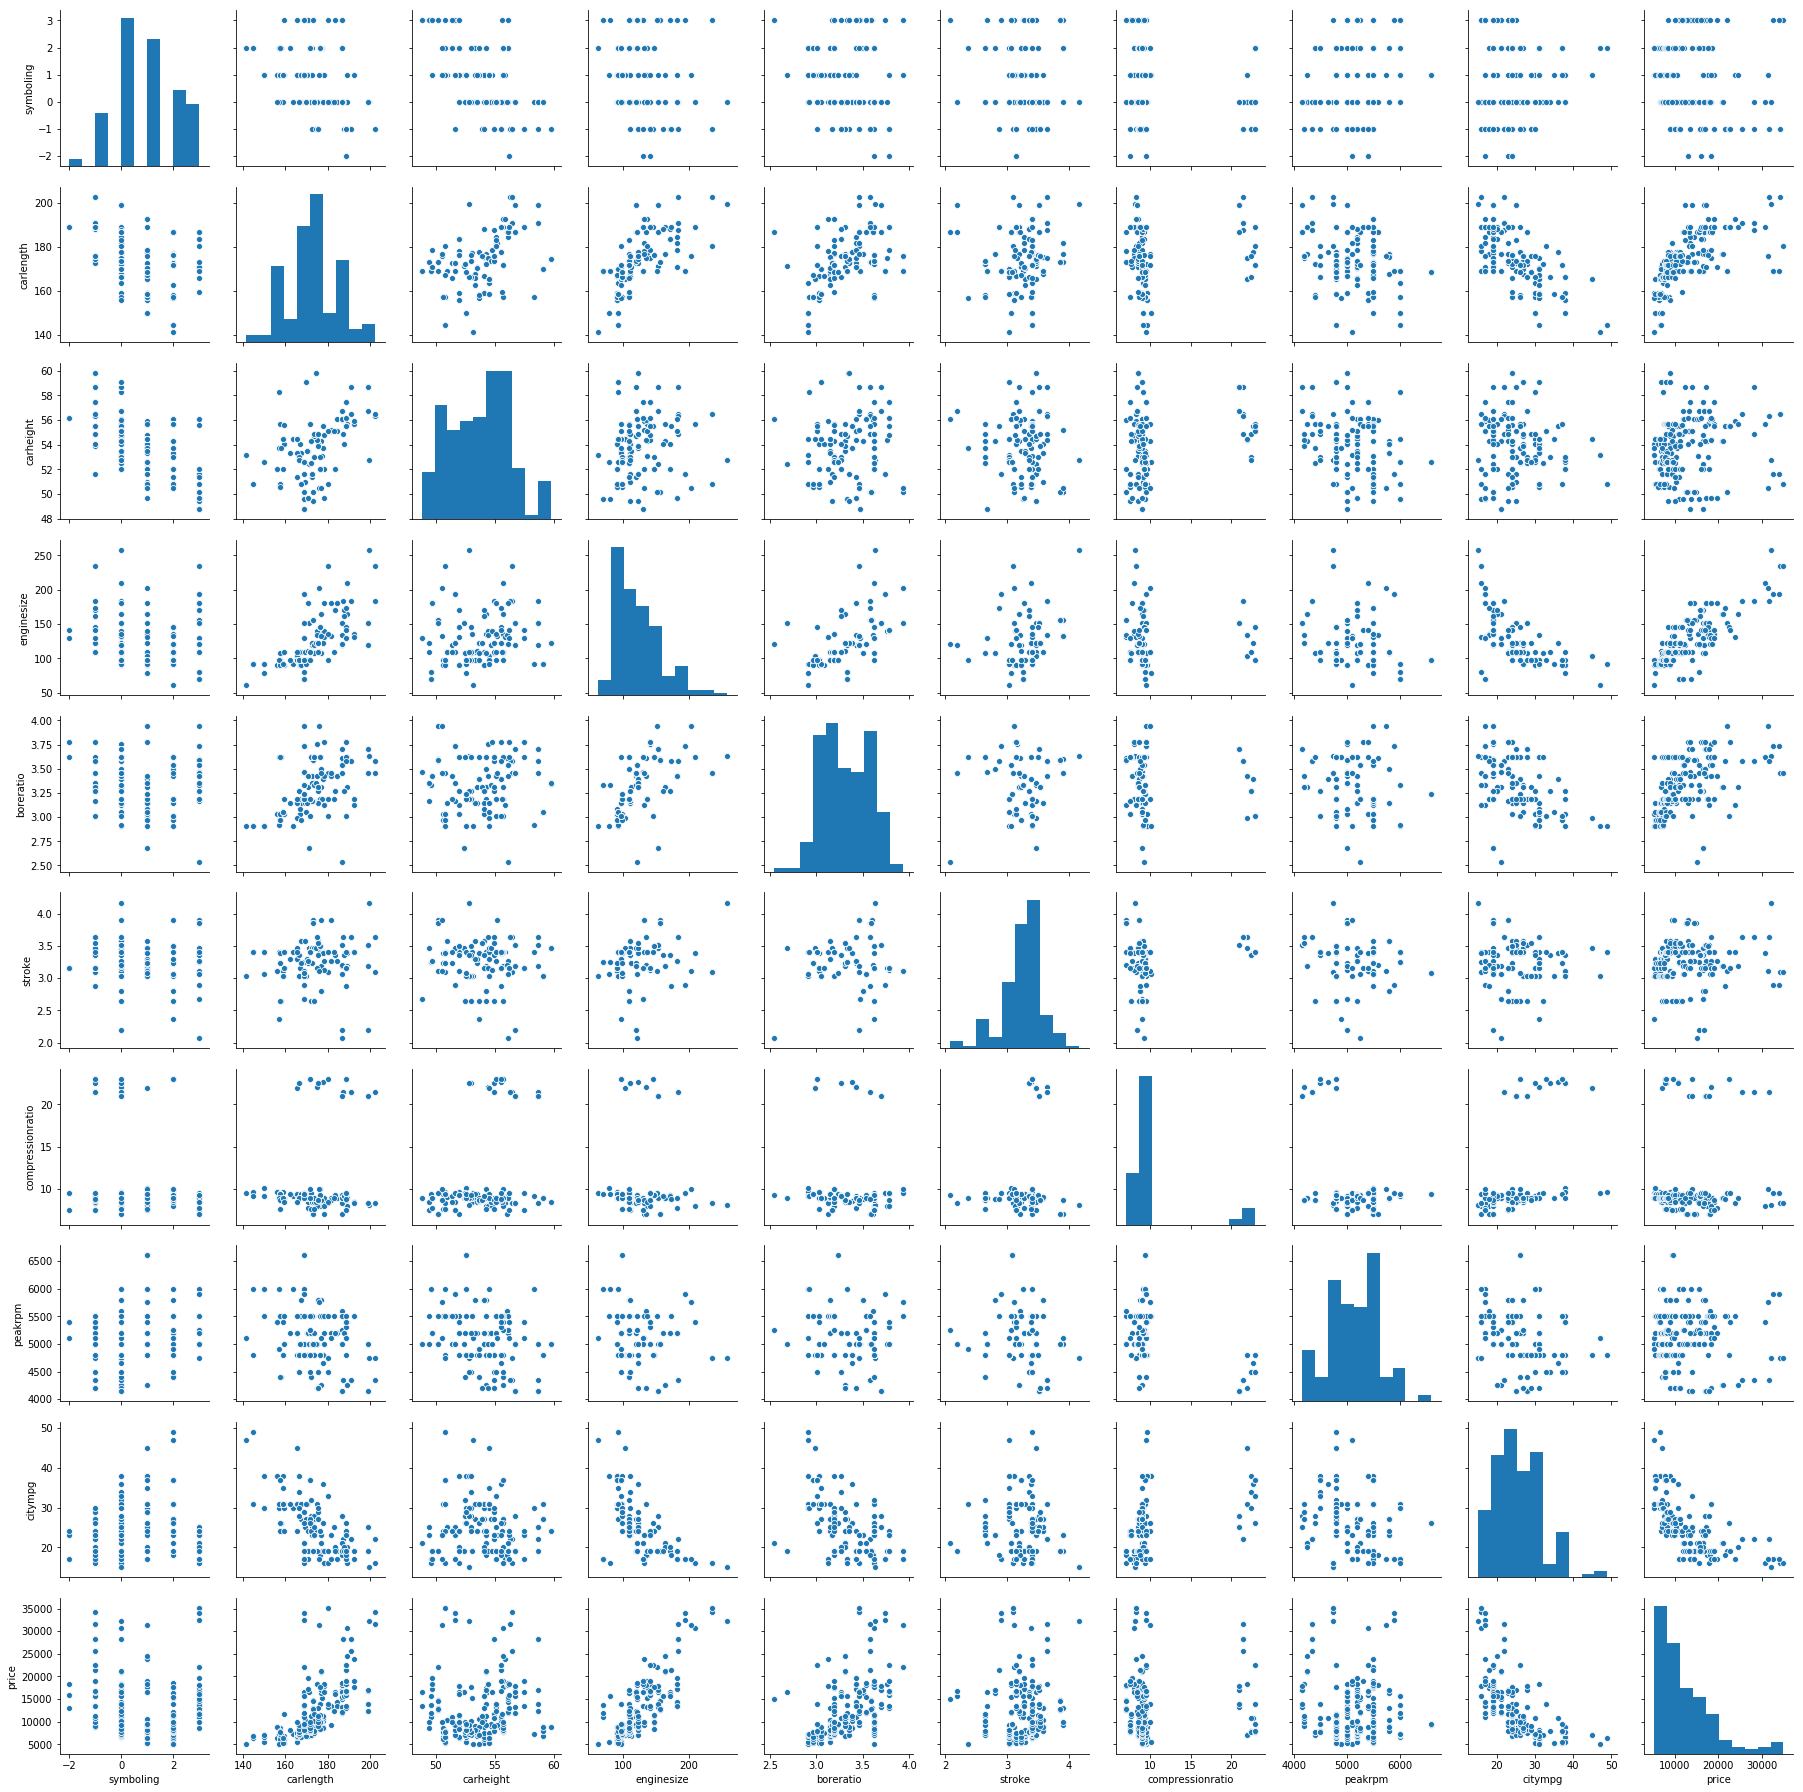

In [18]:
sns.pairplot(car_data)
plt.show()

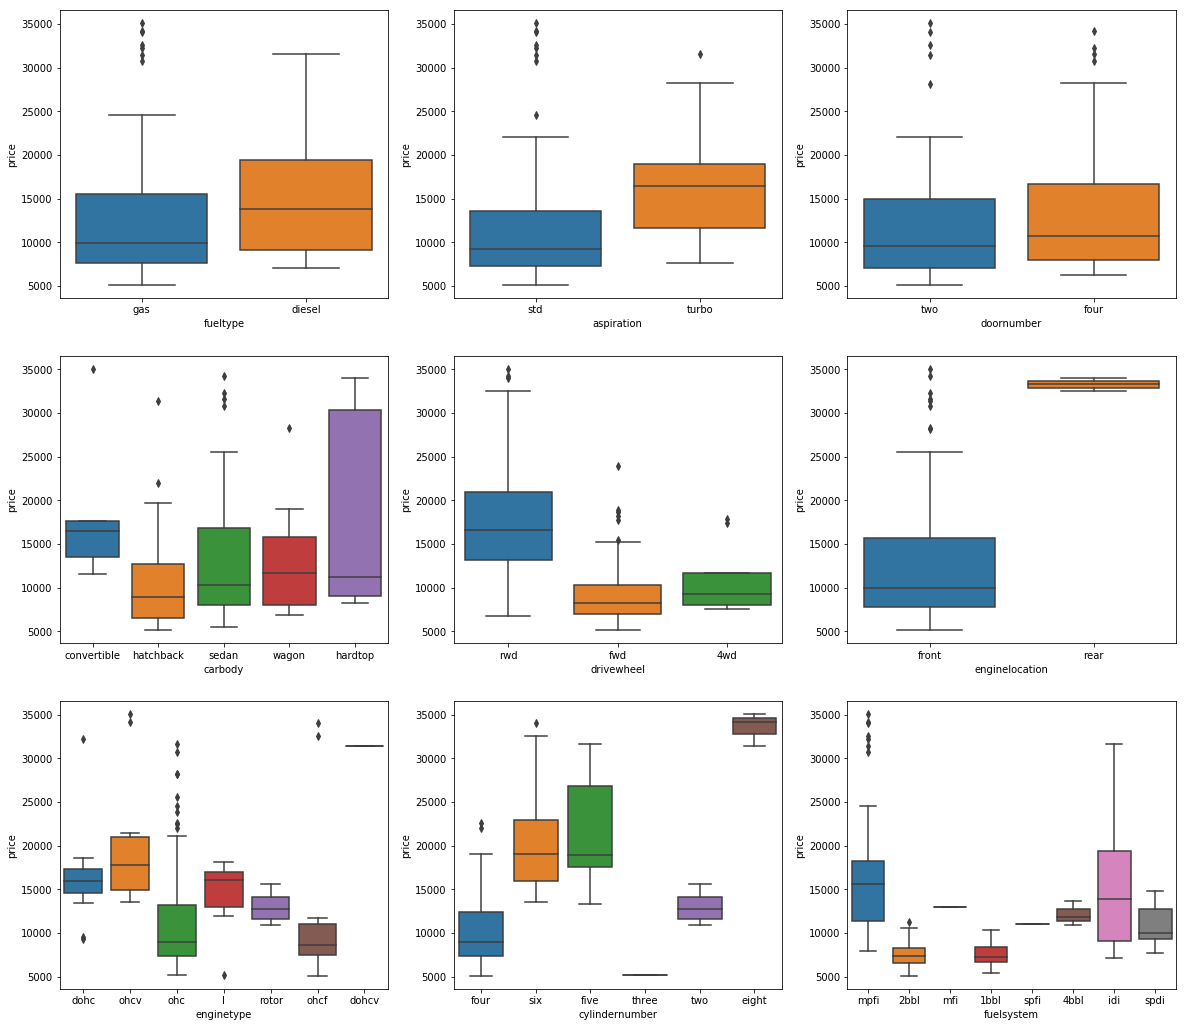

In [19]:
plt.figure(figsize=(20, 18))
plt.subplot(3,3,1)
#sns.boxplot(x = 'carCompany', y = 'price', data = car_data)
#plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car_data)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_data)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_data)
plt.show()

##### From the above plots we have the below observations

<ol>
    <li>Engine Size has a direct bearing on the price of the car, this can also be seen from the heatmap</li>
    <li>Number of cylinders in the Engine also impacts the price to an extent</li>
    <li>Engine Type also impacts the price of a car</li>
    <li>Engine location also impacts the price, for example cars where the engine is located at the rear have a high price</li>
</ol>

Let us now try to build a model and see if these observations are correct; and if so by how much they impact the car pricing.

###### Checking for any null Data

In [20]:
car_data.isnull().sum()

symboling           0
carCompany          0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
carlength           0
carheight           0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
peakrpm             0
citympg             0
price               0
dtype: int64

#### Converting the categorical Data into Numerical
<ul>
    <li>Fuel Type : Gas -> 0, Diesel -> 1</li>
    <li>Aspiration : Std -> 0, Turbo -> 1</li>
    <li>Doornumber : Two -> 0, Four -> 1</li>
    <li>Engine Location : Front -> 0, Rear -> 1</li>
</ul>

In [21]:
car_data['fueltype'] = car_data['fueltype'].apply(lambda x : 0 if x == 'gas' else 1)
car_data['aspiration'] = car_data['aspiration'].apply(lambda x : 0 if x == 'std' else 1)
car_data['doornumber'] = car_data['doornumber'].apply(lambda x : 0 if x == 'two' else 1)
car_data['enginelocation'] = car_data['enginelocation'].apply(lambda x : 0 if x == 'front' else 1)

In [22]:
car_data.head()

,symboling,carCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,peakrpm,citympg,price
0,3,alfa-romero,0,0,0,convertible,rwd,0,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,5000,21,13495.0
1,3,alfa-romero,0,0,0,convertible,rwd,0,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,5000,21,16500.0
2,1,alfa-romero,0,0,0,hatchback,rwd,0,171.2,52.4,ohcv,six,152,mpfi,2.68,3.47,9.0,5000,19,16500.0
3,2,audi,0,0,1,sedan,fwd,0,176.6,54.3,ohc,four,109,mpfi,3.19,3.40,10.0,5500,24,13950.0
4,2,audi,0,0,1,sedan,4wd,0,176.6,54.3,ohc,five,136,mpfi,3.19,3.40,8.0,5500,18,17450.0


#### For all other categorical variables, we will use pandas get_dummies to create the dummy variables

In [23]:
df = pd.get_dummies(car_data)
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,0,0,0,0,168.8,48.8,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,0,0,0,0,168.8,48.8,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,171.2,52.4,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,0,0,1,0,176.6,54.3,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,0,0,1,0,176.6,54.3,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


#### Test Data and Train Data Split

Let us split the data into Training data and Test data. We are keeping 70% of the data as training data and the rest 30% as the test data

In [24]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Normalizing the data
Using MinMaxScaler we are normalizing all the numerical variables

In [25]:
scaler = MinMaxScaler()

In [26]:
num_vars = ['symboling', 'carlength', 'carheight', 'enginesize', 'boreratio', 
            'stroke', 'compressionratio', 'peakrpm', 'citympg', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

/home/himangshu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/himangshu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/himangshu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [27]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
80,1.0,0,1,0,0,0.518699,0.054545,0.248731,0.450000,0.661905,...,0,0,0,0,0,0,0,0,1,0
3,0.8,0,0,1,0,0.577236,0.500000,0.243655,0.464286,0.633333,...,0,0,0,0,0,0,0,1,0,0
190,1.0,0,0,0,0,0.400000,0.236364,0.243655,0.464286,0.633333,...,0,0,0,0,0,0,0,1,0,0
28,0.2,0,0,1,0,0.544715,1.000000,0.309645,0.571429,0.661905,...,0,0,0,1,0,0,0,0,0,0
96,0.6,0,0,1,0,0.393496,0.518182,0.182741,0.435714,0.580952,...,0,0,0,1,0,0,0,0,0,0


In [28]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,...,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,0.575362,0.094203,0.188406,0.572464,0.014493,0.521174,0.452635,0.308835,0.542495,0.555193,...,0.007246,0.021739,0.050725,0.362319,0.014493,0.094203,0.007246,0.420290,0.043478,0.007246
std,0.244595,0.293175,0.392460,0.496523,0.119946,0.189651,0.223075,0.173386,0.193349,0.153188,...,0.085126,0.146362,0.220234,0.482421,0.119946,0.293175,0.085126,0.495404,0.204674,0.085126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.000000,0.000000,0.000000,0.409756,0.290909,0.182741,0.364286,0.495238,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.000000,0.000000,1.000000,0.000000,0.515447,0.481818,0.248731,0.521429,0.571429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,0.000000,0.000000,1.000000,0.000000,0.601626,0.609091,0.406091,0.707143,0.633333,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### From the previous observation we saw that the engine size and car price had a very high correlation; let us try to build a basic model using only engine size as the input parameter and see how it performs

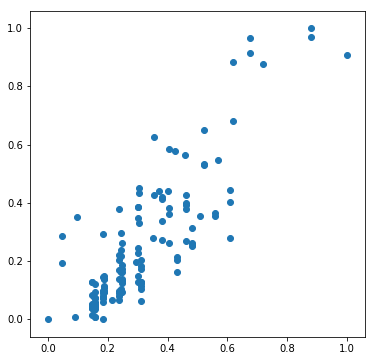

In [29]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.show()

In [30]:
y_train = df_train.pop('price')
X_train = df_train

In [31]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

/home/himangshu/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [32]:
# Check the parameters obtained

lr.params

const        -0.088940
enginesize    1.094105
dtype: float64

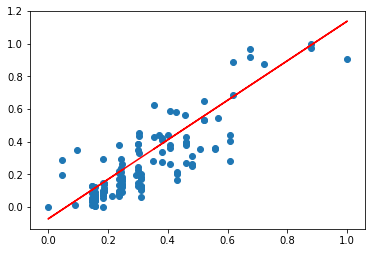

In [33]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.073 + 1.21*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [34]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     348.4
Date:                Sun, 26 May 2019   Prob (F-statistic):           2.46e-39
Time:                        15:50:06   Log-Likelihood:                 98.994
No. Observations:                 138   AIC:                            -194.0
Df Residuals:                     136   BIC:                            -188.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0889      0.021     -4.288      0.0

##### From the above table we can see that engine size is a pretty good predictor for car price; we are getting an Adjusted R Square of 0.717 and p value of 0.

Now let us see if we can do any better by considering other variables. Let us first do some coarse tuning by doing automated feature selection using rfe(Recursive Feature Elimination); we are tuning it down to 15 features

In [35]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 50),
 ('fueltype', True, 1),
 ('aspiration', False, 15),
 ('doornumber', False, 32),
 ('enginelocation', True, 1),
 ('carlength', False, 9),
 ('carheight', False, 48),
 ('enginesize', False, 34),
 ('boreratio', False, 17),
 ('stroke', False, 14),
 ('compressionratio', False, 49),
 ('peakrpm', False, 45),
 ('citympg', True, 1),
 ('carCompany_alfa-romero', False, 4),
 ('carCompany_audi', False, 31),
 ('carCompany_bmw', False, 38),
 ('carCompany_buick', False, 3),
 ('carCompany_chevrolet', False, 12),
 ('carCompany_dodge', True, 1),
 ('carCompany_honda', False, 37),
 ('carCompany_isuzu', False, 36),
 ('carCompany_jaguar', True, 1),
 ('carCompany_mazda', True, 1),
 ('carCompany_mercury', False, 46),
 ('carCompany_mitsubishi', True, 1),
 ('carCompany_nissan', False, 2),
 ('carCompany_peugeot', True, 1),
 ('carCompany_plymouth', True, 1),
 ('carCompany_porsche', False, 8),
 ('carCompany_renault', False, 47),
 ('carCompany_saab', False, 29),
 ('carCompany_subaru', True, 

In [38]:
col = X_train.columns[rfe.support_]
col

Index(['fueltype', 'enginelocation', 'citympg', 'carCompany_dodge',
       'carCompany_jaguar', 'carCompany_mazda', 'carCompany_mitsubishi',
       'carCompany_peugeot', 'carCompany_plymouth', 'carCompany_subaru',
       'carCompany_toyota', 'carCompany_volkswagen', 'cylindernumber_eight',
       'fuelsystem_1bbl', 'fuelsystem_spfi'],
      dtype='object')

In [39]:
X_train.columns[~rfe.support_]

Index(['symboling', 'aspiration', 'doornumber', 'carlength', 'carheight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm',
       'carCompany_alfa-romero', 'carCompany_audi', 'carCompany_bmw',
       'carCompany_buick', 'carCompany_chevrolet', 'carCompany_honda',
       'carCompany_isuzu', 'carCompany_mercury', 'carCompany_nissan',
       'carCompany_porsche', 'carCompany_renault', 'carCompany_saab',
       'carCompany_volvo', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
     

In [40]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [41]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

/home/himangshu/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [42]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [43]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     67.79
Date:                Sun, 26 May 2019   Prob (F-statistic):           1.02e-51
Time:                        15:50:07   Log-Likelihood:                 165.47
No. Observations:                 138   AIC:                            -298.9
Df Residuals:                     122   BIC:                            -252.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.51

##### From the above table we can see that adjusted R square value has gone up to 0.893; and apart from fuelsystem_spfi all other variables have a low p value.

Let us drop fuelsystem_spfi and try to build a new model

In [44]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [45]:
X_train_new.drop(['fuelsystem_spfi'], axis = 1, inplace = True)

In [46]:
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     71.40
Date:                Sun, 26 May 2019   Prob (F-statistic):           4.60e-52
Time:                        15:50:08   Log-Likelihood:                 163.92
No. Observations:                 138   AIC:                            -297.8
Df Residuals:                     123   BIC:                            -253.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.51

##### From the above table we can see that adjusted R square value has not changed much after dropping fuelsystem_spfi; and is now 0.89; also the AIC and BIC scores have improved a bit; all the p values are less than 0.05; hence all the features considered are significant for the model

Let us check the VIF score and see if any other variable can be dropped from here.

##### From the above table we can see that adjusted R square value has not changed much after dropping fuelsystem_spfi; and is now 0.891; also the AIC and BIC scores have improved a bit.

However we see that the p value of carCompany_porcshce is now greater that 0.05; so let us drop carCompany_porcshce and try to build a new model

##### From the above table we can see that adjusted R square value has not changed much after dropping carCompany_porcshce; and is now 0.889; also all the p values are less than 0.05

Let us check the vif values and see if any hidden collinearility is there

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
X = X.drop(['const'], axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,citympg,2.61
0,fueltype,1.45
10,carCompany_toyota,1.28
11,carCompany_volkswagen,1.21
3,carCompany_dodge,1.19
7,carCompany_peugeot,1.19
13,fuelsystem_1bbl,1.19
5,carCompany_mazda,1.17
6,carCompany_mitsubishi,1.14
9,carCompany_subaru,1.13


### Residual Analysis for Training Data

Let us now check if the error terms for the training data is normally distributed by plotting a histogram of the actual price for the training data and the prediicted price of the training data

In [48]:
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

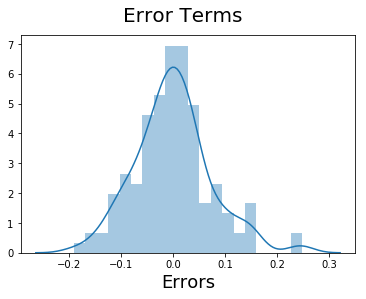

In [49]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Predictions

Let us now predict the prices for the test data

#### Data Standardization

In [50]:
num_vars = ['symboling', 'carlength', 'carheight', 'enginesize', 'boreratio', 
            'stroke', 'compressionratio', 'peakrpm', 'citympg', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

/home/himangshu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/himangshu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### Dividing the data into x_test and y_test

In [51]:
y_test = df_test.pop('price')
X_test = df_test

#### Evavluationg the model

Make the predictions using the model and evaluate the same

In [52]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
x_train_temp =  X_train_new
x_train_temp.drop(['const'], axis = 1, inplace = True)
X_test_new = X_test[x_train_temp.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

/home/himangshu/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [53]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

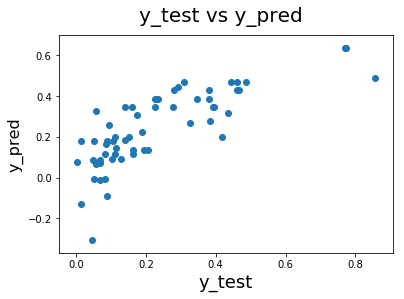

In [54]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0.5, 0, 'Errors')

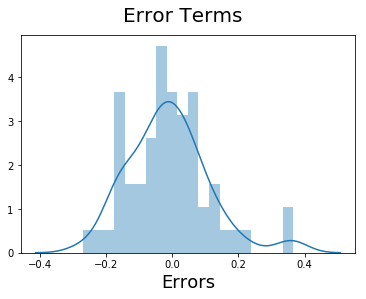

In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Checking R2 score for the test data

In [56]:
r2 = sklearn.metrics.r2_score(y_test, y_pred)
r2

0.5922660384591618

### From the above figures we can see that the model does quite well in predicting the prices on the traiining data however when the model is run on the test data the R2 score falls down to 59.23(aprox.)
#### However we also see that enginesize which was could be seen as one of the major trendsetters for the car price is not being considered at all; and the car company is playing a major role in determining the price of the car. However our business case is different; wherein we are launching a new product and want to check based on what car features we can determine the pricing of the car.

##### Based on the above use case let us try to build one new model by dropping the car company feature and see whether we are able to give some pointers to the car features which impacts the car prices

## Alternate model by dropping the carCompany

As we are launching a new prduct to the market we are more interested in the features of the car impacting the price rather than the company

In [57]:
car_data_temp = car_data.drop(['carCompany'], axis = 1)

# For all other categorical variables, we will use pandas get_dummies to create the dummy variables

df1 = pd.get_dummies(car_data_temp)
df1.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,0,0,0,0,168.8,48.8,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,0,0,0,0,168.8,48.8,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,171.2,52.4,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,0,0,1,0,176.6,54.3,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,0,0,1,0,176.6,54.3,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


#### Test Data and Train Data Split

Let us split the data into Training data and Test data. We are keeping 70% of the data as training data and the rest 30% as the test data

In [58]:
np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Normalizing the data
Using MinMaxScaler we are normalizing all the numerical variables

In [59]:
scaler = MinMaxScaler()

In [60]:
num_vars = ['symboling', 'carlength', 'carheight', 'enginesize', 'boreratio', 
            'stroke', 'compressionratio', 'peakrpm', 'citympg', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

/home/himangshu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/himangshu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/himangshu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [61]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
80,1.0,0,1,0,0,0.518699,0.054545,0.248731,0.450000,0.661905,...,0,0,0,0,0,0,0,0,1,0
3,0.8,0,0,1,0,0.577236,0.500000,0.243655,0.464286,0.633333,...,0,0,0,0,0,0,0,1,0,0
190,1.0,0,0,0,0,0.400000,0.236364,0.243655,0.464286,0.633333,...,0,0,0,0,0,0,0,1,0,0
28,0.2,0,0,1,0,0.544715,1.000000,0.309645,0.571429,0.661905,...,0,0,0,1,0,0,0,0,0,0
96,0.6,0,0,1,0,0.393496,0.518182,0.182741,0.435714,0.580952,...,0,0,0,1,0,0,0,0,0,0


In [62]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,...,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,0.575362,0.094203,0.188406,0.572464,0.014493,0.521174,0.452635,0.308835,0.542495,0.555193,...,0.007246,0.021739,0.050725,0.362319,0.014493,0.094203,0.007246,0.420290,0.043478,0.007246
std,0.244595,0.293175,0.392460,0.496523,0.119946,0.189651,0.223075,0.173386,0.193349,0.153188,...,0.085126,0.146362,0.220234,0.482421,0.119946,0.293175,0.085126,0.495404,0.204674,0.085126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.000000,0.000000,0.000000,0.409756,0.290909,0.182741,0.364286,0.495238,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.000000,0.000000,1.000000,0.000000,0.515447,0.481818,0.248731,0.521429,0.571429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,0.000000,0.000000,1.000000,0.000000,0.601626,0.609091,0.406091,0.707143,0.633333,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
y_train = df_train.pop('price')
X_train = df_train

#### Using RFE to do a coarse tuning for feature selection; putting the number of features to 15

In [64]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [65]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [66]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 13),
 ('fueltype', False, 7),
 ('aspiration', True, 1),
 ('doornumber', False, 14),
 ('enginelocation', True, 1),
 ('carlength', True, 1),
 ('carheight', False, 19),
 ('enginesize', True, 1),
 ('boreratio', False, 22),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('carbody_convertible', False, 5),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', False, 24),
 ('carbody_sedan', False, 20),
 ('carbody_wagon', False, 25),
 ('drivewheel_4wd', False, 18),
 ('drivewheel_fwd', False, 17),
 ('drivewheel_rwd', False, 6),
 ('enginetype_dohc', False, 23),
 ('enginetype_dohcv', False, 15),
 ('enginetype_l', False, 27),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 28),
 ('enginetype_ohcv', False, 10),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', False, 9),
 ('cylindernumber_four', False, 4),
 ('cylindernumber_six', False, 8),
 ('cylindernumber_three', True, 

In [67]:
col = X_train.columns[rfe.support_]
col

Index(['aspiration', 'enginelocation', 'carlength', 'enginesize', 'stroke',
       'compressionratio', 'peakrpm', 'citympg', 'carbody_hardtop',
       'enginetype_ohc', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_three', 'cylindernumber_two', 'fuelsystem_mpfi'],
      dtype='object')

In [68]:
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'doornumber', 'carheight', 'boreratio',
       'carbody_convertible', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [69]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

#### Building the model based on the RFE selected features

In [70]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

/home/himangshu/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [71]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [72]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     84.74
Date:                Sun, 26 May 2019   Prob (F-statistic):           3.94e-56
Time:                        15:50:11   Log-Likelihood:                 174.54
No. Observations:                 138   AIC:                            -319.1
Df Residuals:                     123   BIC:                            -275.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1076 

##### From the above table we can see that adjusted R square value is 0.895; however we see that the p-value for citympg is greater than 0.05; hence let us drop the same and see whether we can build a relevant model

In [73]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

X_train_new.drop(['citympg'], axis = 1, inplace = True)

import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     89.95
Date:                Sun, 26 May 2019   Prob (F-statistic):           1.41e-56
Time:                        15:50:12   Log-Likelihood:                 173.13
No. Observations:                 138   AIC:                            -318.3
Df Residuals:                     124   BIC:                            -277.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1948 

##### From the above table we can see that adjusted R square value has not changed much after dropping citympg; and is now 0.894; also the AIC and BIC scores have improved a bit.

However we see that the p value of carbody_hardtop is now greater that 0.05; so let us drop carbody_hardtop and try to build a new model

In [74]:
X_train_new = X_train_new.drop(['const'], axis=1)

X_train_new.drop(['carbody_hardtop'], axis = 1, inplace = True)

import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     95.00
Date:                Sun, 26 May 2019   Prob (F-statistic):           9.03e-57
Time:                        15:50:12   Log-Likelihood:                 171.05
No. Observations:                 138   AIC:                            -316.1
Df Residuals:                     125   BIC:                            -278.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1958 

##### From the above table we can see that adjusted R square value has not changed much after dropping carbody_hardtop; and is now 0.892; also the AIC and BIC scores have improved a bit; also all the p-values are less than 0.05. Let us now check the vif of the features using which the model is built

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
X = X.drop(['const'], axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/home/himangshu/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
8,enginetype_rotor,inf
11,cylindernumber_two,inf
4,stroke,32.58
3,enginesize,23.13
2,carlength,17.55
6,peakrpm,8.91
7,enginetype_ohc,6.55
12,fuelsystem_mpfi,3.76
5,compressionratio,2.66
9,cylindernumber_eight,1.66


##### From the VIF table we can see that some variables have a very high vif values; let us drop enginetype_rotor and try to build a new model

In [76]:
X_train_new = X_train_new.drop(['const'], axis=1)

X_train_new.drop(['enginetype_rotor'], axis = 1, inplace = True)

import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     95.00
Date:                Sun, 26 May 2019   Prob (F-statistic):           9.03e-57
Time:                        15:50:12   Log-Likelihood:                 171.05
No. Observations:                 138   AIC:                            -316.1
Df Residuals:                     125   BIC:                            -278.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1958 

/home/himangshu/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


##### From the above table we can see that adjusted R square value has not changed even after dropping enginetype_rotor;let us again check the VIF values and see if any other features can be dropped from the model

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
X = X.drop(['const'], axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,stroke,32.58
3,enginesize,23.13
2,carlength,17.55
6,peakrpm,8.91
7,enginetype_ohc,6.55
11,fuelsystem_mpfi,3.76
5,compressionratio,2.66
8,cylindernumber_eight,1.66
1,enginelocation,1.65
0,aspiration,1.58


##### From the above table we can see some very high VIF values; let us drop the feature(stroke) with the highest VIF value; and try to build a new model

In [78]:
X_train_new = X_train_new.drop(['const'], axis=1)

X_train_new.drop(['stroke'], axis = 1, inplace = True)

import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

/home/himangshu/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     86.62
Date:                Sun, 26 May 2019   Prob (F-statistic):           2.95e-53
Time:                        15:50:12   Log-Likelihood:                 159.51
No. Observations:                 138   AIC:                            -295.0
Df Residuals:                     126   BIC:                            -259.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2344 

##### From the above table we can see that adjusted R square value has now become 0.873; however the p-value for peakrpm is now 0.419; let us drop peakrpm and try to build a new model

In [79]:
X_train_new = X_train_new.drop(['const'], axis=1)

X_train_new.drop(['peakrpm'], axis = 1, inplace = True)

import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     95.48
Date:                Sun, 26 May 2019   Prob (F-statistic):           4.06e-54
Time:                        15:50:12   Log-Likelihood:                 159.15
No. Observations:                 138   AIC:                            -296.3
Df Residuals:                     127   BIC:                            -264.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2134 

##### From the above table we can see that adjusted R square value has now become 0.865; and all the p-values are under 0.05. Let us now check the VIF values

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
X = X.drop(['const'], axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,carlength,15.95
3,enginesize,12.77
9,fuelsystem_mpfi,2.97
5,enginetype_ohc,2.52
4,compressionratio,2.36
0,aspiration,1.52
6,cylindernumber_eight,1.46
1,enginelocation,1.28
8,cylindernumber_two,1.13
7,cylindernumber_three,1.00


##### From the above table we can see that carlength has a vif value of 15.95; let us drop the same and build a new model

In [81]:
X_train_new = X_train_new.drop(['const'], axis=1)

X_train_new.drop(['carlength'], axis = 1, inplace = True)

import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     91.06
Date:                Sun, 26 May 2019   Prob (F-statistic):           2.83e-51
Time:                        15:50:12   Log-Likelihood:                 149.47
No. Observations:                 138   AIC:                            -278.9
Df Residuals:                     128   BIC:                            -249.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1440 

/home/himangshu/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


##### From the above table we can see that adjusted R square value has now become 0.855; however the p-value for cylindernumber_three is now 0.169; let us drop cylindernumber_three and try to build a new model

In [82]:
X_train_new = X_train_new.drop(['const'], axis=1)

X_train_new.drop(['cylindernumber_three'], axis = 1, inplace = True)

import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     101.5
Date:                Sun, 26 May 2019   Prob (F-statistic):           6.95e-52
Time:                        15:50:13   Log-Likelihood:                 148.45
No. Observations:                 138   AIC:                            -278.9
Df Residuals:                     129   BIC:                            -252.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1335 

##### From the above table we can see that adjusted R square value has now become 0.854; however the p-value for enginetype_ohc is now 0.065; let us drop enginetype_ohc and try to build a new model

In [83]:
X_train_new = X_train_new.drop(['const'], axis=1)

X_train_new.drop(['enginetype_ohc'], axis = 1, inplace = True)

import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     113.3
Date:                Sun, 26 May 2019   Prob (F-statistic):           3.44e-52
Time:                        15:50:13   Log-Likelihood:                 146.61
No. Observations:                 138   AIC:                            -277.2
Df Residuals:                     130   BIC:                            -253.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0986 

##### From the above table we can see that adjusted R square value has now become 0.852; also all the p-values are less than 0.05; let us check the vif for the features of this new model

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
X = X.drop(['const'], axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,4.29
6,fuelsystem_mpfi,2.55
3,compressionratio,2.02
0,aspiration,1.50
4,cylindernumber_eight,1.23
1,enginelocation,1.09
5,cylindernumber_two,1.02


##### From the above we see that all the VIFs are less than 5

### From the above we have a model where all the features are significant (p-value less than 0.05) and not a very big collinearilty (all VIF values less than 5)

##### Let us now test the model and see how it performs

### Residual Analysis for Training Data

Let us now check if the error terms for the training data is normally distributed by plotting a histogram of the actual price for the training data and the prediicted price of the training data

In [85]:
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

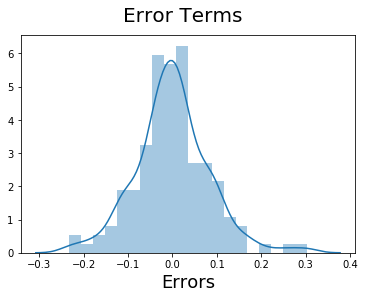

In [86]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

##### From the above plot it can be seen that the error terms are indeed normally distributed; so we can say that one of the assumptions of linear distribution is indeed true

### Predictions

Let us now predict the prices for the test data

#### Data Standardization

In [87]:
num_vars = ['symboling', 'carlength', 'carheight', 'enginesize', 'boreratio', 
            'stroke', 'compressionratio', 'peakrpm', 'citympg', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

/home/himangshu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/himangshu/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### Dividing the data into x_test and y_test

In [88]:
y_test = df_test.pop('price')
X_test = df_test

#### Evaluationg the model on the test data

Make the predictions using the model and evaluate the same

In [89]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
x_train_temp =  X_train_new
x_train_temp.drop(['const'], axis = 1, inplace = True)
X_test_new = X_test[x_train_temp.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

/home/himangshu/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [90]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

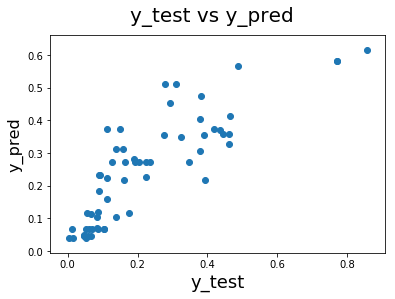

In [91]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0.5, 0, 'Errors')

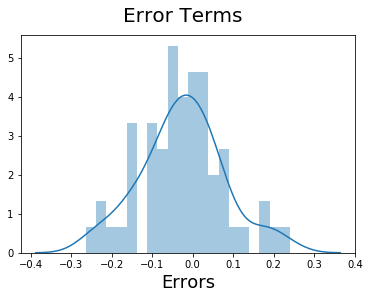

In [92]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Residual score for the test data

In [93]:
r2 = sklearn.metrics.r2_score(y_test, y_pred)
r2

0.6929191125642418

### From the above figures we can see that the model does quite well in predicting the prices on the traiining data however when the model is run on the test data the R2 score falls down to 0.69(aprox.)

#### On comparison of both the models we can see the first model performs better on the training data; wheras the second model performs much better on the test data than the first model. Also we can see that the first model was mostly dependant on the car brand to predict the price of the car and in doing so it had dropped one of the most significant variables that is directly impacting the price (the enginesize of the car); hence the performance dropped drastically on the test data i.e. the first model is overfitting the data more than the second model

##### Based on the above I would recommend the second model to be used for the price prediction. The variables of the this model will be:

<ol>
    <li>enginesize</li>
    <li>fuelsystem_mpfi</li>
    <li>compressionratio</li>
    <li>aspiration</li>
    <li>cylindernumber_eight</li>
    <li>enginelocation</li>
    <li>cylindernumber_two</li>
</ol>

##### The 'adjusted R2' value for this model on the training data is 0.852 and the 'R2' value on the test data is 0.692

### Recommendations for Geely Auto

#### Based on the above model it can be recommended to Geely auto concentrate the below features of a car

<ul>
<li>Engine Size</li>
<li>Fuel System</li>
<li>Compression Ratio</li>
<li>Aspiration</li>
<li>Number of Cylinders</li>
<li>Engine Location</li>
</ul>